In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

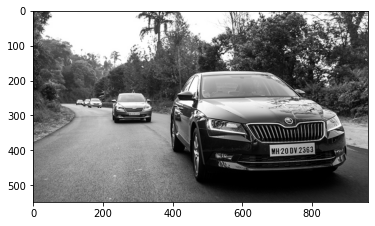

In [2]:
img = cv2.imread('img5.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

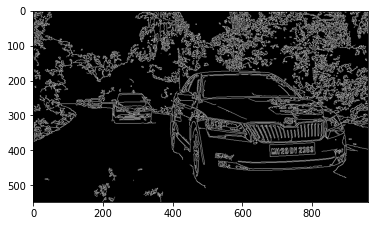

In [3]:
bfilter= cv2.bilateralFilter(gray,11,17,17) #noise reduction
edged =cv2.Canny(bfilter,30,200)#edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [4]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key = cv2.contourArea, reverse=True)[:10]

In [5]:
location = None
for contour in contours:
    approx=cv2.approxPolyDP(contour,10,True)
    if len(approx) == 4:
        location = approx
        break

In [6]:
location

array([[[807, 380]],

       [[678, 384]],

       [[679, 418]],

       [[808, 411]]], dtype=int32)

In [7]:
mask=np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask=mask)

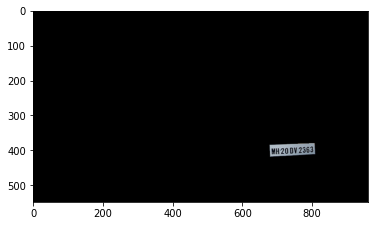

In [8]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [9]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x),np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1,y1:y2+1]

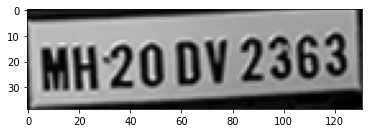

In [10]:
plt.imshow(cv2.cvtColor(cropped_image,cv2.COLOR_BGR2RGB))

In [11]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[0, 4], [131, 4], [131, 37], [0, 37]], 'MH20 DV 2363', 0.5435011630275409)]

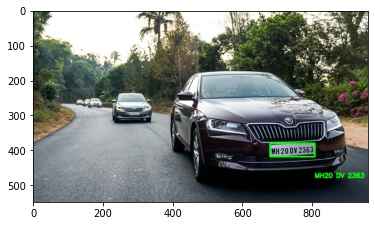

In [12]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img,text=text, org=(approx[0][0][0], approx[2][0][1]+60),fontFace=font,fontScale=0.6,color=(0,255,0),thickness=2,lineType=cv2.LINE_AA)
res= cv2.rectangle(img,tuple(approx[0][0]),tuple(approx[2][0]),(0,255,0),3)
plt.imshow(cv2.cvtColor(res,cv2.COLOR_BGR2RGB))